# Introduction

### Dans cette analyse, nous explorerons les prix et les caractéristiques des locations Airbnb à travers les États-Unis. Notre objectif est de comprendre les tendances de voyage, les préférences des voyageurs et les dynamiques du marché immobilier dans le secteur de l'hébergement touristique aux États-Unis.


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import warnings 


In [35]:
path = "C:/Users/Tliba/Documents/data mining/Projet DS/Airbnb_data.csv"

In [36]:
df = pd.read_csv(path)

In [37]:
df=pd.DataFrame(df)

In [38]:
print('This dataset has', df.shape[0], 'row, and ', df.shape[1], 'columns')

This dataset has 74111 row, and  29 columns


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [40]:
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,t,t,NaN,2012-03-26,f,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,2017-08-05,t,f,100%,2017-06-19,t,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,2017-04-30,t,t,100%,2016-10-25,t,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,This light-filled home-away-from-home is super...,NaN,t,t,NaN,2015-04-19,f,NaN,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,"Cool, cozy, and comfortable studio located in ...",2015-05-12,t,t,100%,2015-03-01,t,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [41]:
df.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


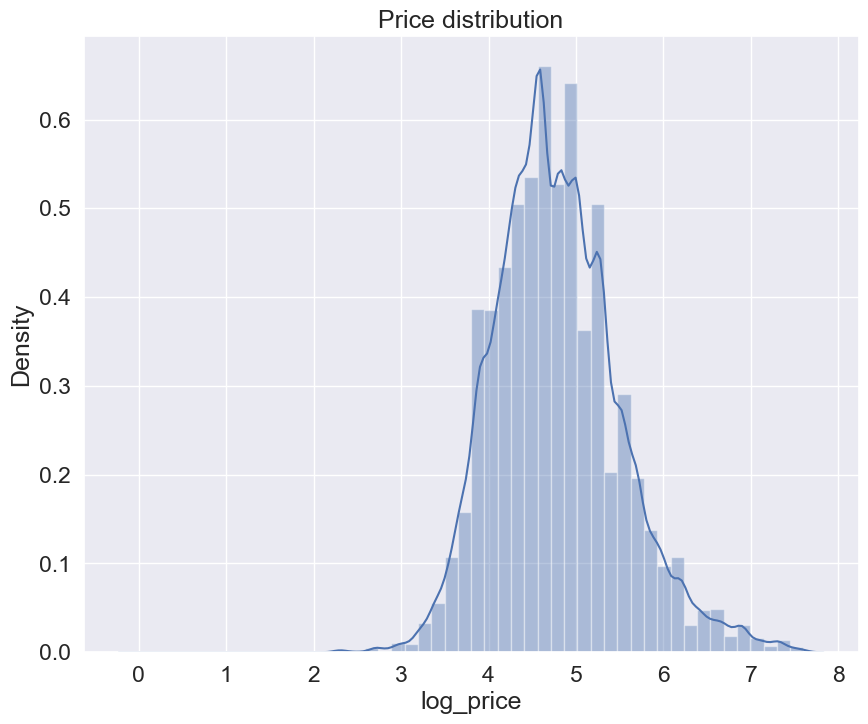

In [42]:
plt.figure(figsize = (10, 8))
sns.distplot(df["log_price"])
plt.title('Price distribution')
plt.show()
warnings.filterwarnings('ignore') 
  

### La pique s'étend vers la droite, montrant que certaines airbnb sont beaucoup plus chères que la plupart. Il y a plus de choses à bas prix qu'à des prix plus élevés. 

In [43]:
df.drop(columns=['id'])

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,t,t,NaN,2012-03-26,f,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,2017-08-05,t,f,100%,2017-06-19,t,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,2017-04-30,t,t,100%,2016-10-25,t,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,This light-filled home-away-from-home is super...,NaN,t,t,NaN,2015-04-19,f,NaN,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,"Cool, cozy, and comfortable studio located in ...",2015-05-12,t,t,100%,2015-03-01,t,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,4.605170,Apartment,Private room,{},1,1.0,Real Bed,flexible,False,NYC,one room in bushwick apt,NaN,t,t,NaN,2013-03-24,f,NaN,40.709025,-73.939405,one room bushwick,Williamsburg,0,NaN,https://a0.muscache.com/im/pictures/55162426/6...,11206.0,1.0,1.0
74107,5.043425,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,2.0,Real Bed,moderate,True,LA,"Located on the Pacific Coast Highway, this apa...",2016-08-15,t,f,100%,2016-05-03,f,2017-04-15,33.871549,-118.396053,Spacious Hermosa 2 BR on PCH,Hermosa Beach,16,93.0,https://a0.muscache.com/im/pictures/2b86560b-a...,90254,2.0,4.0
74108,5.220356,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",5,1.0,Real Bed,moderate,True,NYC,A modern apartment located in East Williamsbur...,2015-01-03,t,t,100%,2012-01-05,t,2017-09-10,40.706749,-73.942377,Modern 2 Bedroom Apartment in Williamsburg,Williamsburg,43,94.0,https://a0.muscache.com/im/pictures/7fbe448c-5...,11206.0,2.0,2.0
74109,5.273000,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,strict,True,NYC,"Fully renovated, designer's studio located in ...",NaN,t,f,100%,2017-09-17,t,NaN,40.738535,-74.000157,Designer's Apartment in HEART of NYC,West Village,0,NaN,https://a0.muscache.com/im/pictures/b3971b63-0...,10011,0.0,2.0


In [44]:
df = df.drop(columns=['name','latitude','longitude'])

In [45]:
df = df.drop(columns=['host_has_profile_pic'])    

In [46]:
df = df.drop(columns=['thumbnail_url'])    

In [47]:
def plot_on_bar(a):
    a = pd.Categorical(a)
    length = len(a)
    plt.figure(figsize=(15,5))
    ax = sns.countplot(a,palette='Paired')
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/length)
        x = p.get_x() + p.get_width() / 2 - 0.05 
        y = p.get_y() + p.get_height()           
        ax.annotate(percentage, (x, y), size = 12)
    plt.show() 

#### Exclusion of the Id, Name, Latitude, Longitude, and Host_has_profile_pic columns: these details are unnecessary for the purpose of this analysis.

In [48]:
df_location = df[['log_price','city','neighbourhood','zipcode']]

In [49]:
df_location.isnull().sum()

log_price           0
city                0
neighbourhood    6872
zipcode           966
dtype: int64

In [50]:
df_location = df_location.dropna(subset=['neighbourhood','zipcode'])

In [51]:
cities = df_location['city'].value_counts()
cities

city
NYC        31895
LA         17028
SF          6348
DC          4889
Boston      3442
Chicago     3058
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

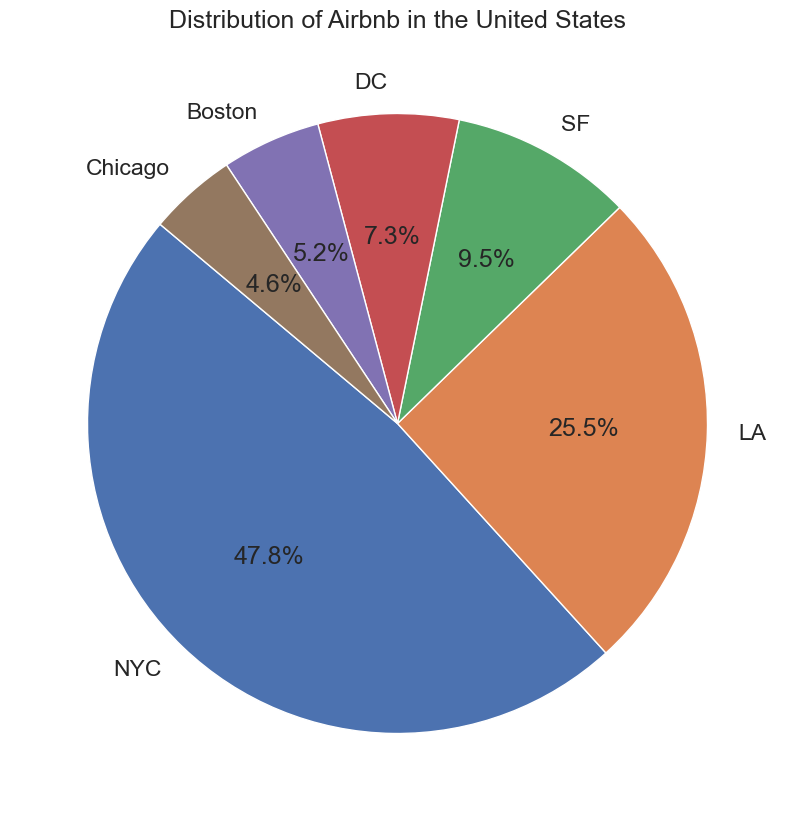

In [67]:
plt.figure(figsize=(10,14))
plt.pie(cities, labels=df_location['city'].value_counts().index, autopct='%1.1f%%', startangle=140 )
plt.title('Distribution of Airbnb in the United States')
plt.show

#### Plus une tranche est grosse, plus il y a de villes dans ce groupe avec un nombre élevé d'annonces Airbnb. On voit qu'il y a des villes plus touristiques ou plus grandes qui concentrent plus d'annonces Airbnb.

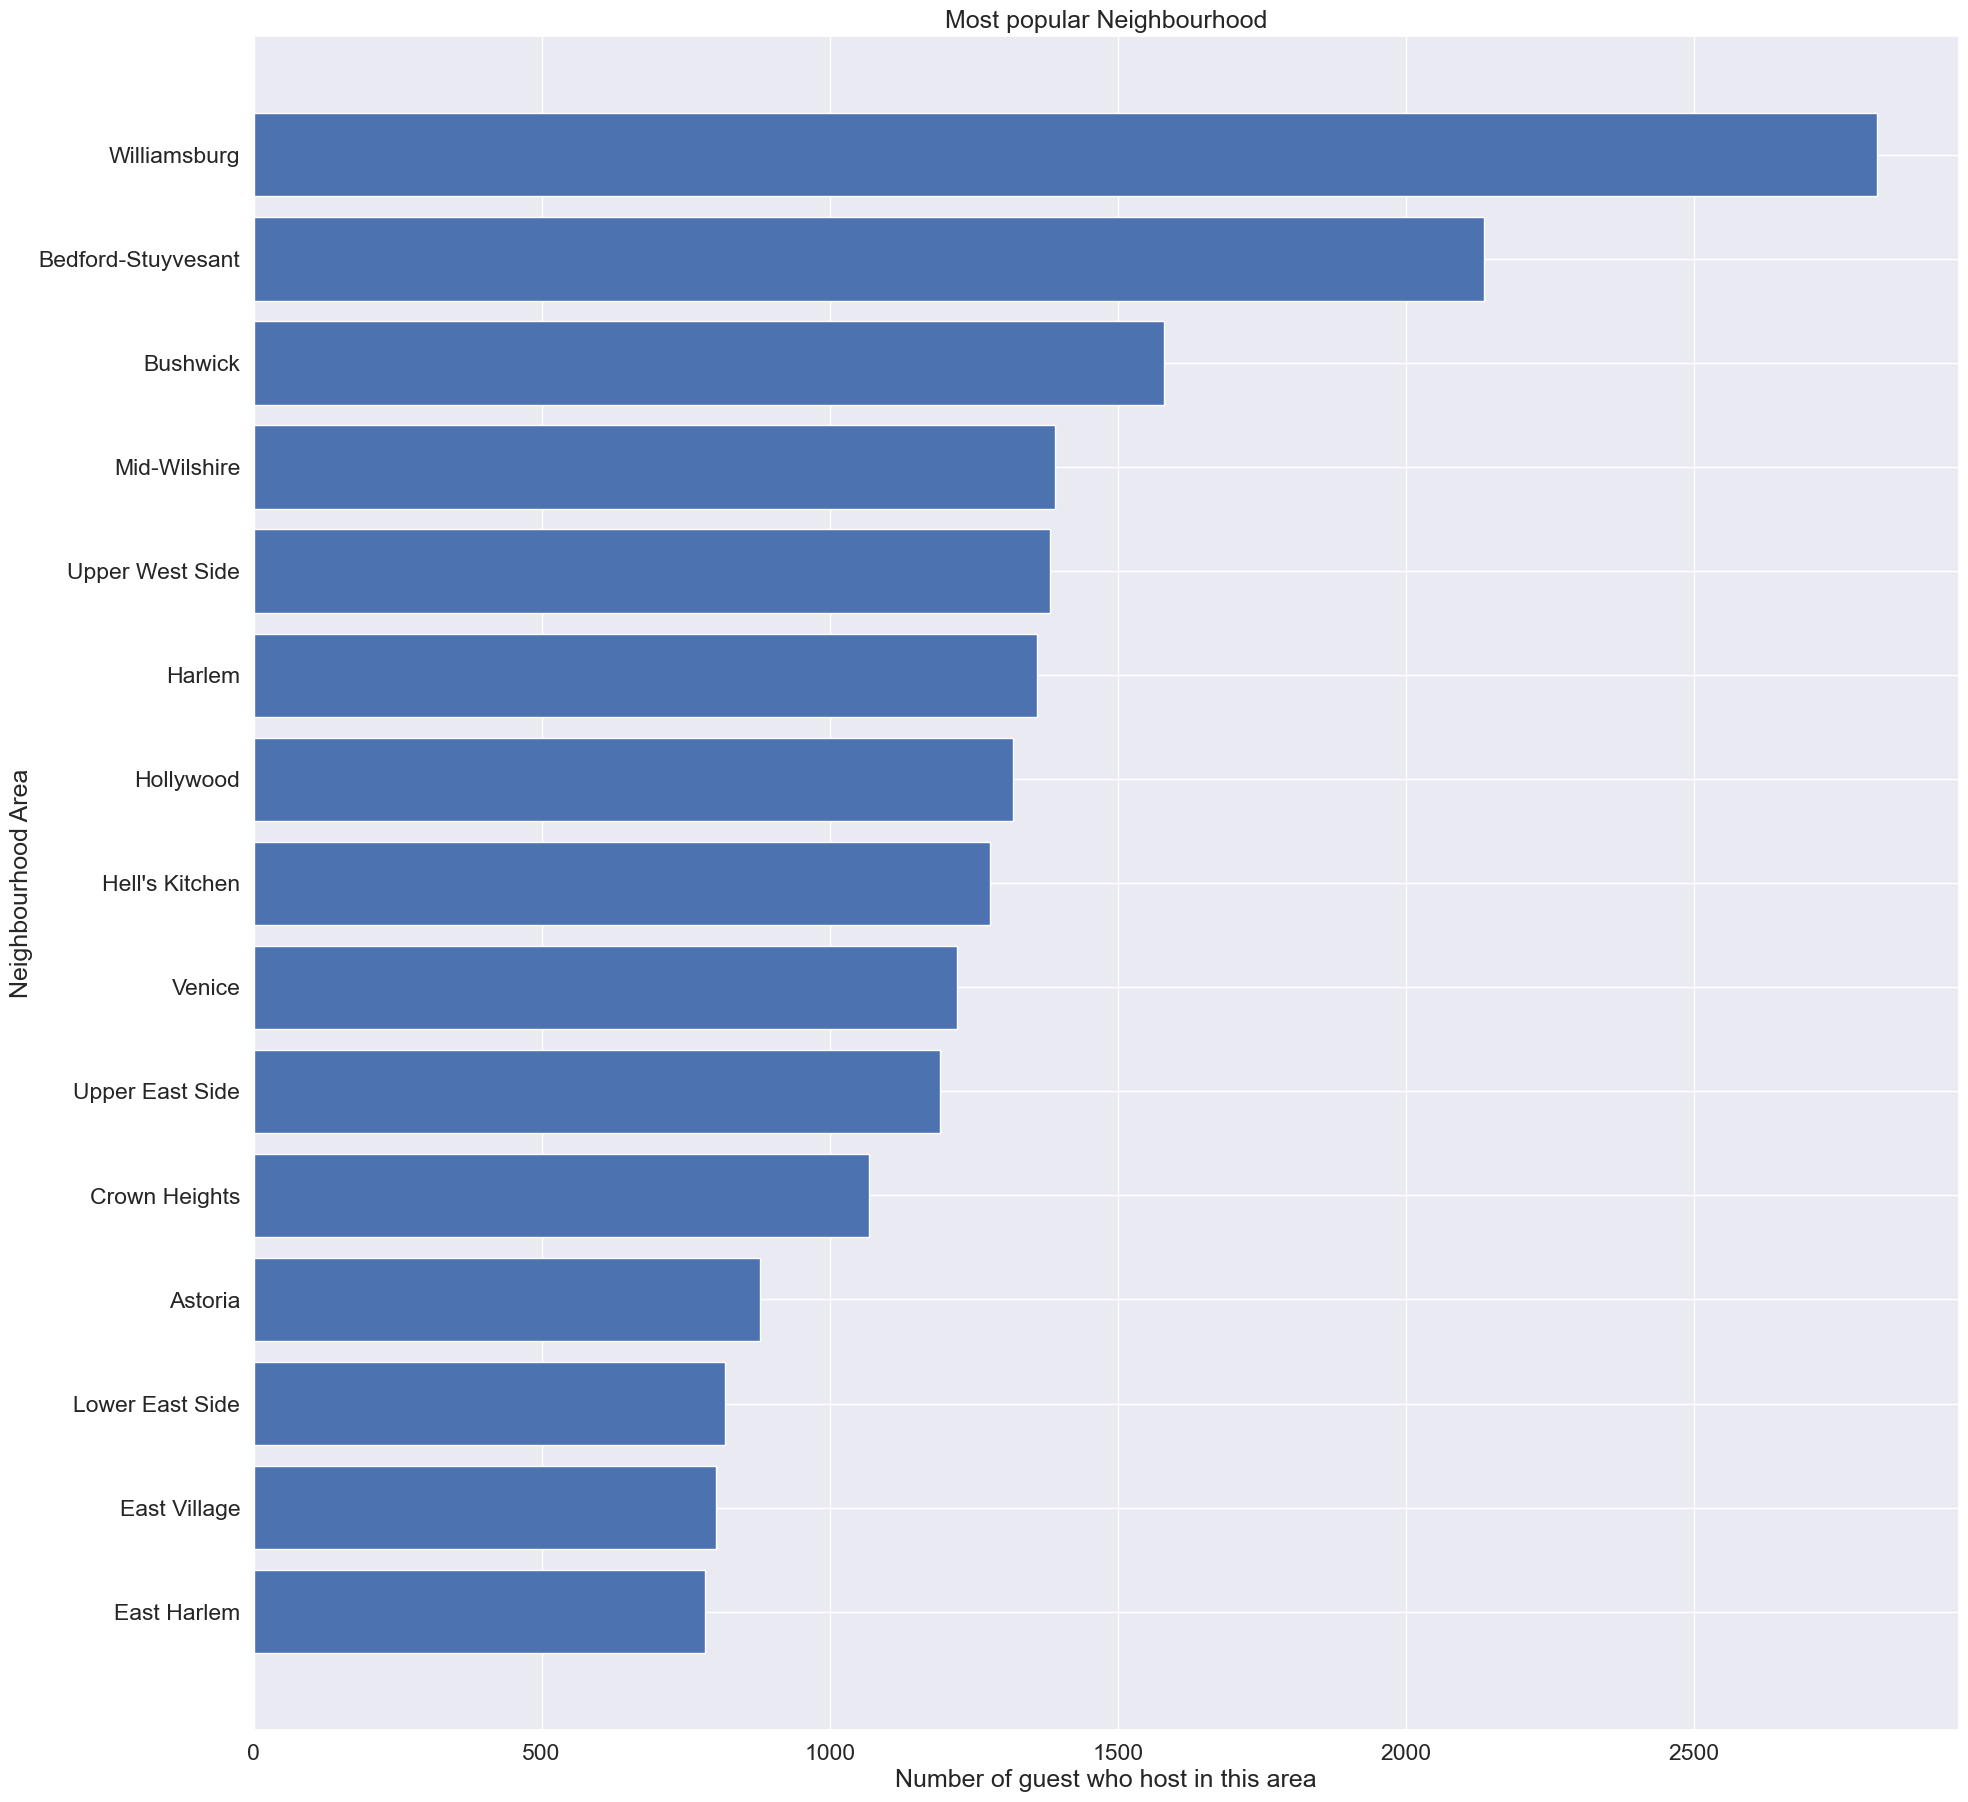

In [53]:
data = df_location.neighbourhood.value_counts()[:15]
plt.figure(figsize=(22,22))
x = list(data.index)
y = list(data.values)
x.reverse()
y.reverse()

plt.title("Most popular Neighbourhood")
plt.ylabel("Neighbourhood Area")
plt.xlabel("Number of guest who host in this area")

plt.barh(x,y)
plt.show()

Text(0, 0.5, 'log_price')

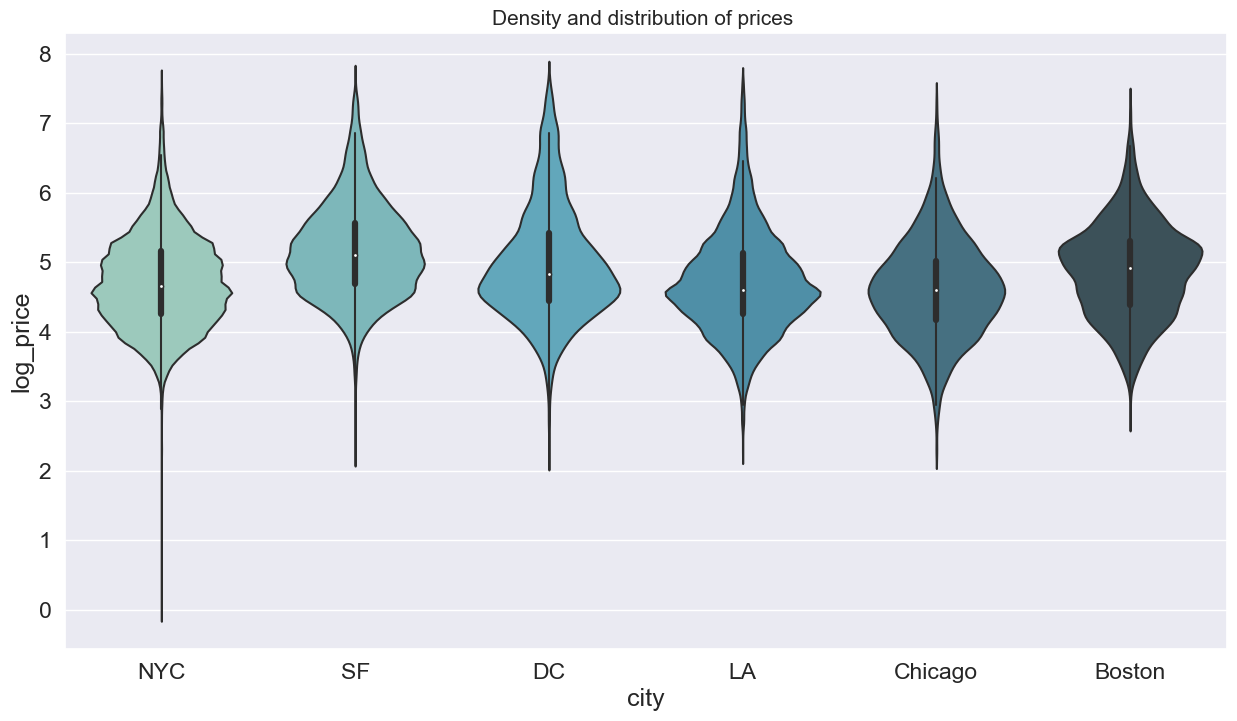

In [54]:
plt.figure(figsize=(15,8))
sns.set(font_scale=1.5)
sns.violinplot(data=df, x='city', y='log_price', palette='GnBu_d')
plt.title('Density and distribution of prices ', fontsize=15)
plt.xlabel('city')
plt.ylabel('log_price')

#### On dirait qu'il y a pas mal d'Airbnb abordables côté droit du graphique (Boston) et quelques uns plus luxueux côté gauch (NYC, SF)

<function matplotlib.pyplot.show(close=None, block=None)>

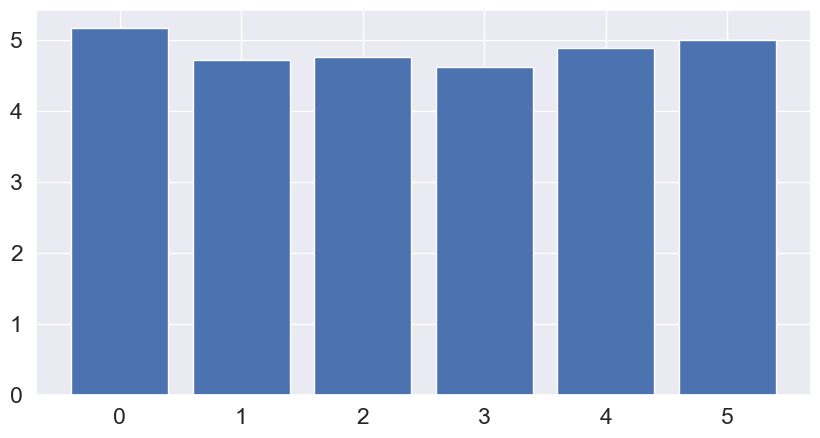

In [74]:
avg_price =  df_location.groupby(df_location['city'])['log_price'].mean()
#color = ['#3e5f8a','#5783bc','#6a9cde','#a0c5f7','#cadffb']
plt.figure(figsize=(10,5))
plt.bar(df['city'].value_counts().index,avg_price )
plt.show

In [56]:
df_luxe = df[['log_price','property_type','room_type','amenities','accommodates','bathrooms','bed_type','cancellation_policy','cleaning_fee','description','instant_bookable','bedrooms','beds']]

In [57]:
df_luxe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   log_price            74111 non-null  float64
 1   property_type        74111 non-null  object 
 2   room_type            74111 non-null  object 
 3   amenities            74111 non-null  object 
 4   accommodates         74111 non-null  int64  
 5   bathrooms            73911 non-null  float64
 6   bed_type             74111 non-null  object 
 7   cancellation_policy  74111 non-null  object 
 8   cleaning_fee         74111 non-null  bool   
 9   description          74111 non-null  object 
 10  instant_bookable     74111 non-null  object 
 11  bedrooms             74020 non-null  float64
 12  beds                 73980 non-null  float64
dtypes: bool(1), float64(4), int64(1), object(7)
memory usage: 6.9+ MB


In [58]:
df_luxe = df_luxe.dropna(subset=['bedrooms','beds','bathrooms'])

In [59]:
df_luxe.isnull().sum()

log_price              0
property_type          0
room_type              0
amenities              0
accommodates           0
bathrooms              0
bed_type               0
cancellation_policy    0
cleaning_fee           0
description            0
instant_bookable       0
bedrooms               0
beds                   0
dtype: int64

In [60]:
test_corr = df[["log_price","accommodates","bathrooms","beds","bedrooms","number_of_reviews","review_scores_rating"]].corr()
test_corr

,log_price,accommodates,bathrooms,beds,bedrooms,number_of_reviews,review_scores_rating
log_price,1.000000,0.567574,0.355420,0.442153,0.473212,-0.032470,0.091219
accommodates,0.567574,1.000000,0.505632,0.810801,0.709258,0.041964,-0.017128
bathrooms,0.355420,0.505632,1.000000,0.525591,0.589935,-0.041381,0.010537
beds,0.442153,0.810801,0.525591,1.000000,0.709416,0.031109,-0.027330
bedrooms,0.473212,0.709258,0.589935,0.709416,1.000000,-0.035149,0.011143
number_of_reviews,-0.032470,0.041964,-0.041381,0.031109,-0.035149,1.000000,0.011708
review_scores_rating,0.091219,-0.017128,0.010537,-0.027330,0.011143,0.011708,1.000000


### Plus de voyageurs = Plus de salles de bain et lits et aussi Le nombre d'avis a peu d'impact

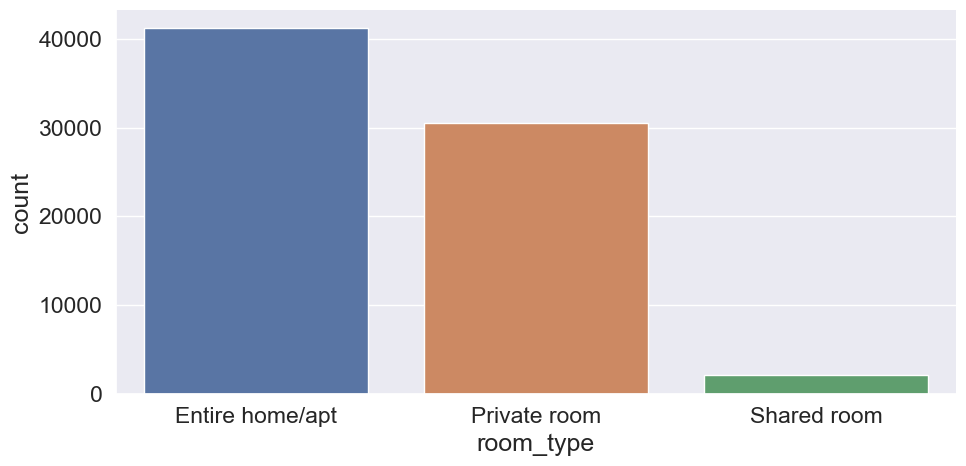

In [61]:
sns.set(font_scale=1.5)
sns.catplot(x="room_type",kind="count",data=df_luxe,height=5, aspect = 2)

#### Le plus de personnes habitent seules dans leur chambre, moins de personnes vivent dans des chambres partagées avec d'autres et moins de personnes vivent seules dans un appartement ou une maison entière que dans une chambre individuelle.

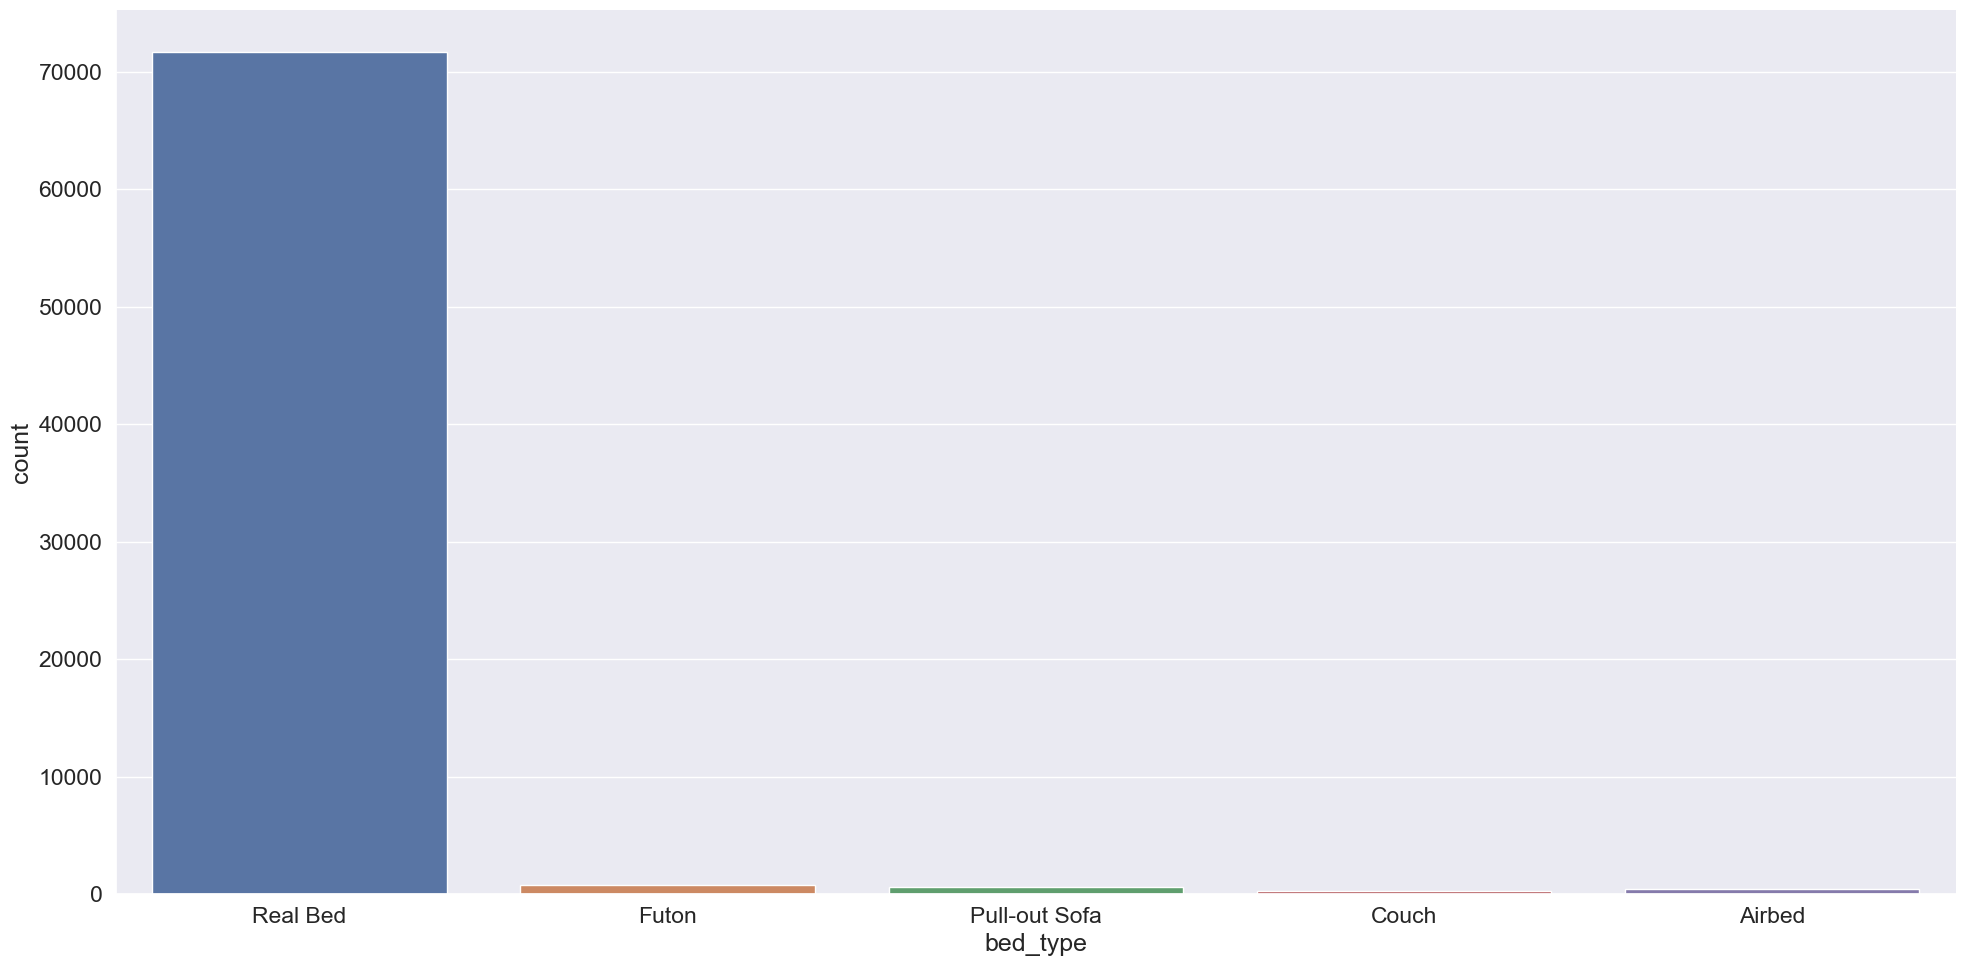

In [62]:
sns.set(font_scale=1.5)
sns.catplot(x="bed_type",kind="count",data=df_luxe,height=10, aspect = 2)

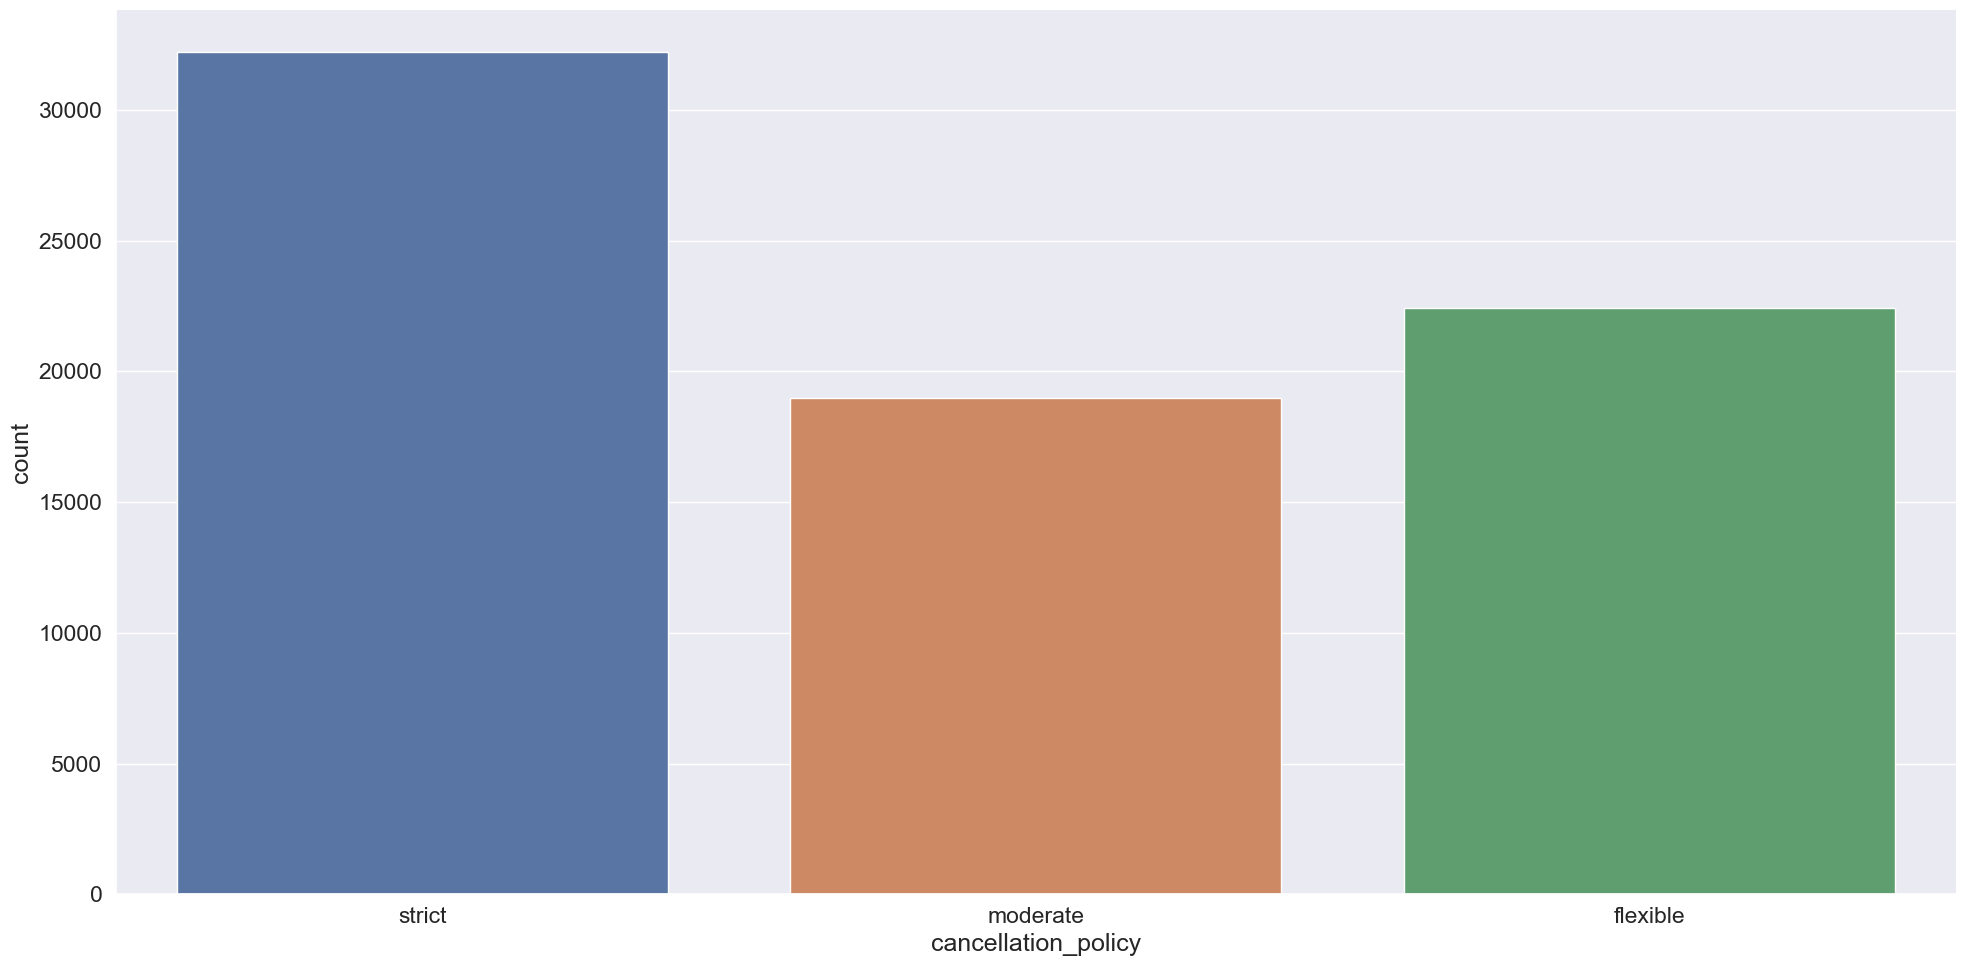

In [63]:
filtered_data = df_luxe[df_luxe['cancellation_policy'].isin(['strict', 'moderate', 'flexible'])]
sns.set(font_scale=1.5)
sns.catplot(x="cancellation_policy", kind="count", data=filtered_data, height=10, aspect=2)

#### Le nombre d'airbnb avec une politique d'annulation stricte est le plus faible parmi les trois catégories.

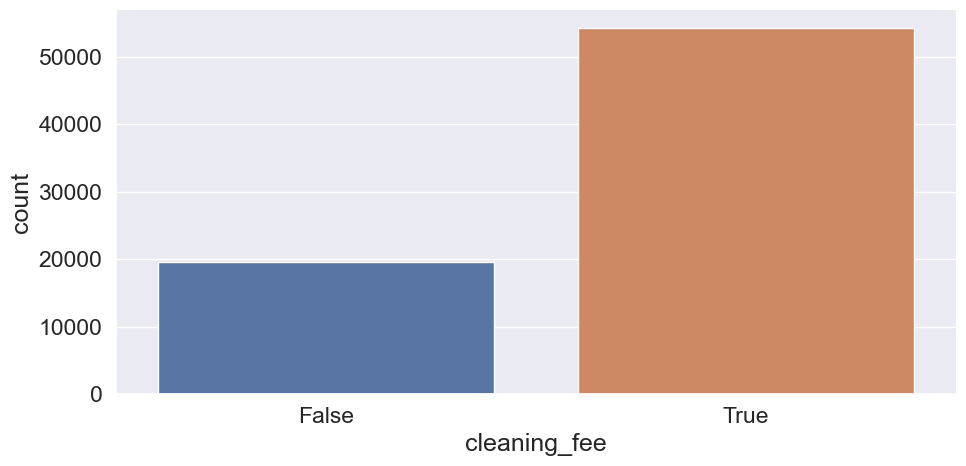

In [64]:
sns.set(font_scale=1.5)
sns.catplot(x="cleaning_fee",kind="count",data=df_luxe,height=5, aspect = 2)

#### La plupart des locations Airbnb ont des frais de ménage inclus dans le prix total.

In [65]:
try:
    df = df.drop(["id","description","first_review","host_since","last_review","neighbourhood", "zipcode"],axis = 1).dropna()
except:
    pass
categorical_col = []
for column in df.columns:
    if df[column].dtypes != "float64" and df[column].dtypes != "int64":
        categorical_col.append(column)
le = LabelEncoder()
for col in categorical_col:
    df[col] = le.fit_transform(df[col])
pd.set_option("display.max_columns",None)


x = df.drop(columns=["log_price"])

y = df["log_price"]


x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=101)

lr = LinearRegression()

lr.fit(x_train,y_train)

y_predict_lr = lr.predict(x_test)

mae_lr = metrics.mean_absolute_error(y_test, y_predict_lr)
mse_lr = metrics.mean_squared_error(y_test, y_predict_lr)
rmse_lr = np.sqrt(metrics.mean_squared_error(y_test, y_predict_lr))
r2_lr = metrics.r2_score(y_test, y_predict_lr)



print('\nMean Absolute Error of Linear Regression: ', mae_lr)
print('\nMean Squarred Error of Linear Regression: ', mse_lr)
print('\nRoot Mean Squarred Error of Linear Regression: ', rmse_lr)
print('\nR2 Score of Linear Regression: ', r2_lr)


Mean Absolute Error of Linear Regression:  0.33287293847907923

Mean Squarred Error of Linear Regression:  0.18265055363071964

Root Mean Squarred Error of Linear Regression:  0.4273763606362893

R2 Score of Linear Regression:  0.5986463845233667


#### Les valeurs de MAE et RMSE relativement faibles. En moyenne, les prédictions sont assez proches des valeurs réelles.
#### On peut dire que le modèle capture un peu plus de la moitié des influences sur la variable étudiée.